In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
ast_leaders = pd.read_pickle('ast_leaders.pkl')

In [3]:
ast_leaders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      100 non-null    object 
 1   Rank      100 non-null    int64  
 2   Pos       100 non-null    object 
 3   C_LEN     100 non-null    int64  
 4   G         100 non-null    int64  
 5   GS        88 non-null     float64
 6   MP        100 non-null    float64
 7   FG        100 non-null    int64  
 8   FGA       100 non-null    int64  
 9   FG%       100 non-null    float64
 10  3P        89 non-null     float64
 11  3PA       89 non-null     float64
 12  3P%       89 non-null     float64
 13  2P        89 non-null     float64
 14  2PA       89 non-null     float64
 15  2P%       89 non-null     float64
 16  eFG%      89 non-null     float64
 17  FT        100 non-null    int64  
 18  FTA       100 non-null    int64  
 19  FT%       100 non-null    float64
 20  ORB       96 non-null     float64

Rank, position(Pos) and name are categorical data

In [4]:
ast_leaders['Name'] = ast_leaders['Name'].astype('category')
ast_leaders['Rank'] = ast_leaders['Rank'].astype('category')
ast_leaders['Pos'] = ast_leaders['Pos'].astype('category')

    In the info we also see a lot of column with null data the, majority being advanced stats which are dependent on stats that were not tracked by the league when those player were active. Triple doubles(Trp Dbl) and 3pt stats are also lacking for the same reason (3pts were adopted by the nba in 1979). Tribple doubles is a stat with considerably less data than the other features so we'll  be removing it


In [5]:
ast_leaders.drop(columns ='Trp Dbl', inplace = True)

Now lets take a look at varibale of interest AST nad its derivatives, AST_PerG(assists per game) and AST%(estimate of the percentage of teamate field goals a player assisted whilhe on the floor)

In [6]:
ast_leaders[['AST', 'AST_PerG', 'AST%']].describe()                                                  

,AST,AST_PerG,AST%
count,100.000000,100.000000,100.000000
mean,6003.630000,6.132000,29.591000
std,1894.999084,1.662472,7.340067
min,4245.000000,3.100000,14.600000
25%,4705.000000,5.000000,24.600000
50%,5430.000000,6.000000,30.100000
75%,6501.250000,7.050000,34.475000
max,15806.000000,11.200000,50.200000


    There are no null data and the min is above 0.

Text(0.5, 0.98, 'Distribution of AST, AST_PerG and AST%')

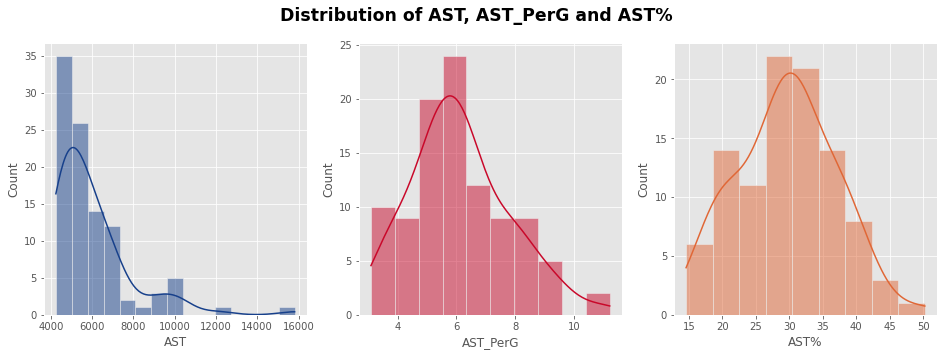

In [7]:
fig,axs = plt.subplots(1,3, figsize = (16,5))
sns.histplot(ast_leaders['AST'], kde = True, color = '#17408B', ax = axs[0])
sns.histplot(ast_leaders['AST_PerG'], kde = True, color = '#C9082A', ax = axs[1])
sns.histplot(ast_leaders['AST%'], kde = True, color = '#E06736', ax =axs[2],)
fig.suptitle('Distribution of AST, AST_PerG and AST%', size = 'xx-large', fontweight = 'bold')



    We can se that the  distribution of assists deviates from a normal distribution with a positive skew
    AST_PerG also has a distribution with a positve skew, albeit less so.
    AST% is the one which the ditribution is closer to a normal distribution.

In [8]:
print ('AST:')
print (f"Skewness: {ast_leaders['AST'].skew()}")
print (f"Kurtosis: {ast_leaders['AST'].kurt()}")
print ('AST_PerG:')
print (f"Skewness: {ast_leaders['AST_PerG'].skew()}")
print (f"Kurtosis: {ast_leaders['AST_PerG'].kurt()}")
print ('AST%:')
print (f"Skewness: {ast_leaders['AST%'].skew()}")
print (f"Kurtosis: {ast_leaders['AST%'].kurt()}")

AST:
Skewness: 2.3036346503531844
Kurtosis: 7.347215181378363
AST_PerG:
Skewness: 0.5668561616633347
Kurtosis: 0.21675391189715754
AST%:
Skewness: 0.09246754920672935
Kurtosis: -0.3263151975006764


Text(0.5, 0.98, 'Boxplot of assist stats over  player position')

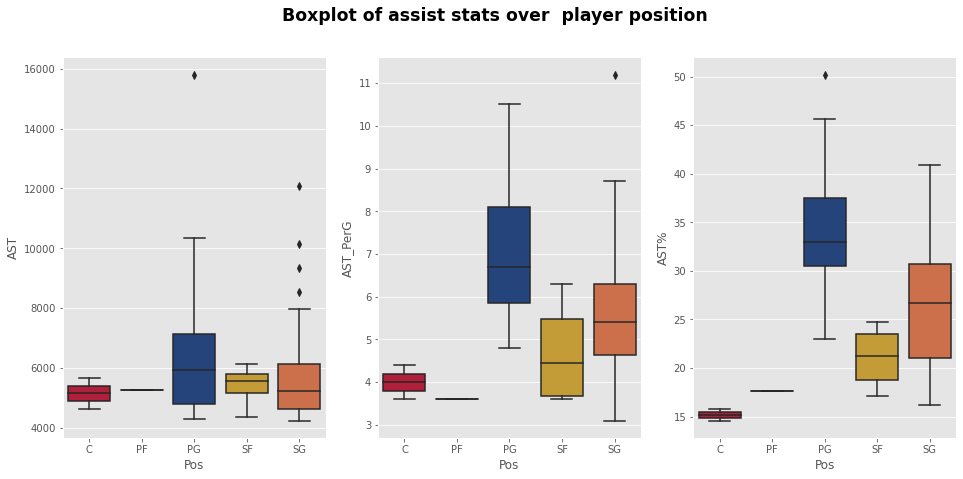

In [9]:
palette = ['#C9082A', 'purple','#17408B', 'goldenrod', '#E06736']
fig,axs = plt.subplots(1,3, figsize = (16,7))
for stat,ax in zip(['AST','AST_PerG','AST%'],axs.flat):
    sns.boxplot(data = ast_leaders, x = 'Pos', y= stat, palette = palette, ax = ax)
fig.suptitle('Boxplot of assist stats over  player position', size = 'xx-large', fontweight = 'bold')

Observing the boxplots we can notice that the variation of the AST is contained almost exclusively in the SG and PG positions.

Looking at the other boxplots it seems very likely that Center(C), Power Fowards (PF) lower variation could be due to a small number observation.
   


In [10]:
ast_leaders.groupby('Pos')['AST'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,2.0,5151.500000,719.127596,4643.0,4897.25,5151.5,5405.75,5660.0
PF,1.0,5248.000000,NaN,5248.0,5248.00,5248.0,5248.00,5248.0
PG,47.0,6408.297872,2183.901335,4293.0,4790.00,5939.0,7127.50,15806.0
SF,4.0,5406.500000,759.277507,4351.0,5171.50,5570.0,5805.00,6135.0
SG,46.0,5695.565217,1621.791378,4245.0,4633.00,5236.0,6122.25,12091.0


C and PF do have a small ammount of observation and so does SF. Actually 93% of the data is distributed between PG and SG which explains why they are responsible for almost all of the variability in the data.

Now let's take a look on the realtionship(correlation) between the data 

<AxesSubplot:>

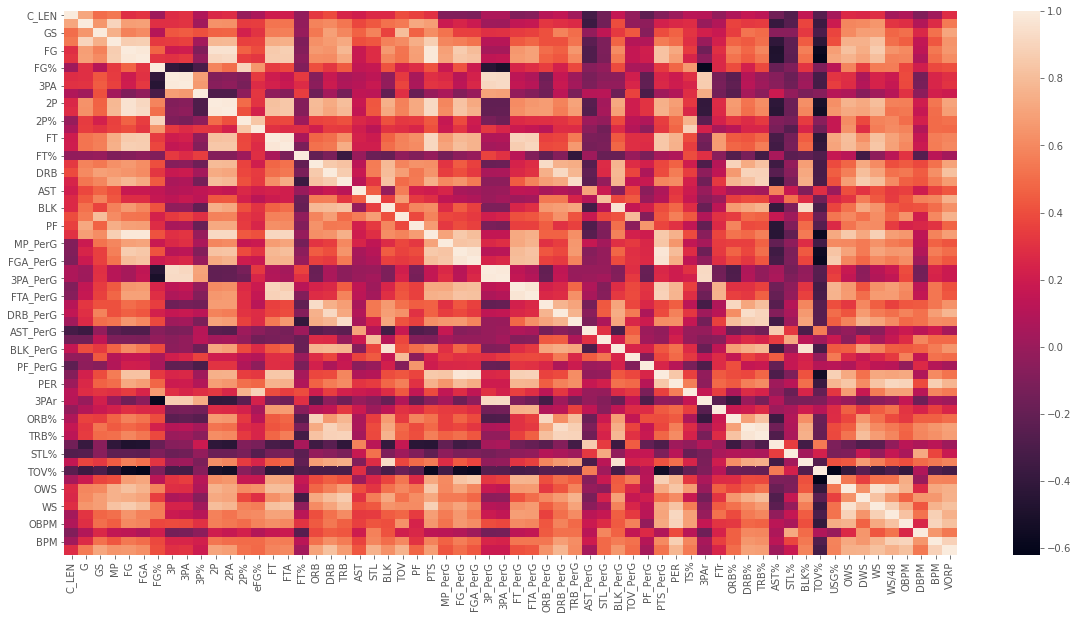

In [11]:
corr = ast_leaders.corr()
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr)

There are so many columns in the data set, that the information overload can make it difficult to intepret the heatmap. But we can see that there are lof of high correlated variables, that's because many stats are derived from eachother, we will deal with the later.

Let's make a cleanup and remove everything whose correlation coefficient absolute value is less than 0.2

In [12]:
drop_lst = corr[np.absolute(corr['AST'])<0.2].index
corr.drop(index = drop_lst, inplace = True)
corr.drop(columns =drop_lst, inplace= True)

Text(0.45, 0.97, 'Heatmap of the correlation between other stats and assists\n (for correlation with asssist greater than 0.2) ')

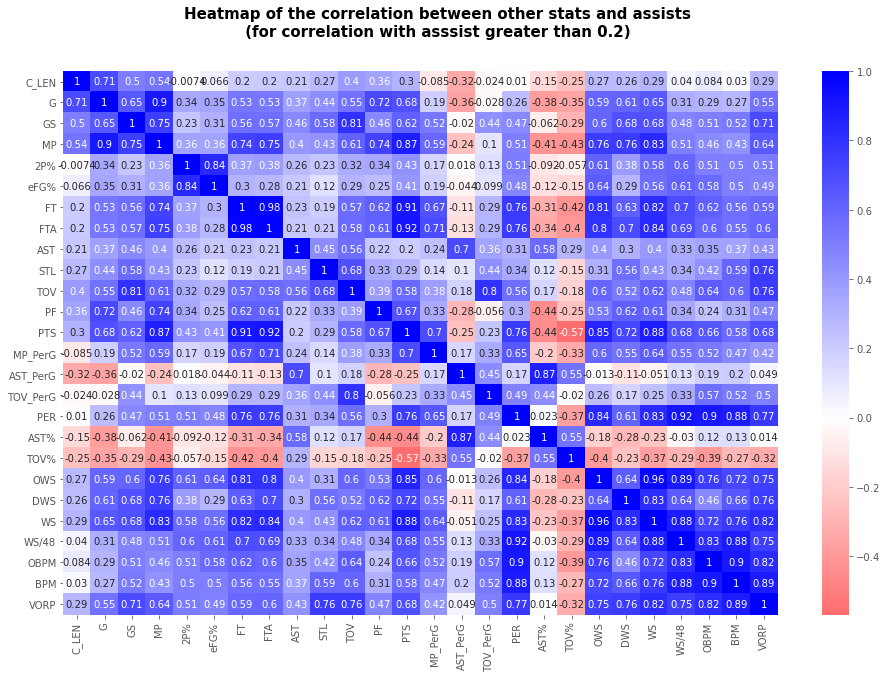

In [13]:
fig,ax = plt.subplots(figsize=(16,10))
sns.heatmap(corr,annot = True,cmap='bwr_r',center=0)
fig.suptitle('Heatmap of the correlation between other stats and assists\n (for correlation with asssist greater than 0.2) ',fontsize = 15, fontweight ='bold', x=0.45,y=0.97)

Some interesting datapoints are how AST is not negatively correlated to any other features, but AST% and AST_PerG are negatively correlated with the majority of them. 
Another datapoint that initally suprise me was the relationship between AST and TOV, the third strongest asssit correlation, but after thinking for a second it makes sense. A player who have a lot of assists is the one that passes the ball a lot and the most common type of turnovers comes from passes (https://squared2020.com/2019/01/27/the-no-turnover-turnover/).

Text(0.5, 1.02, 'Pairplot of the 7 highest correlated features with AST ')

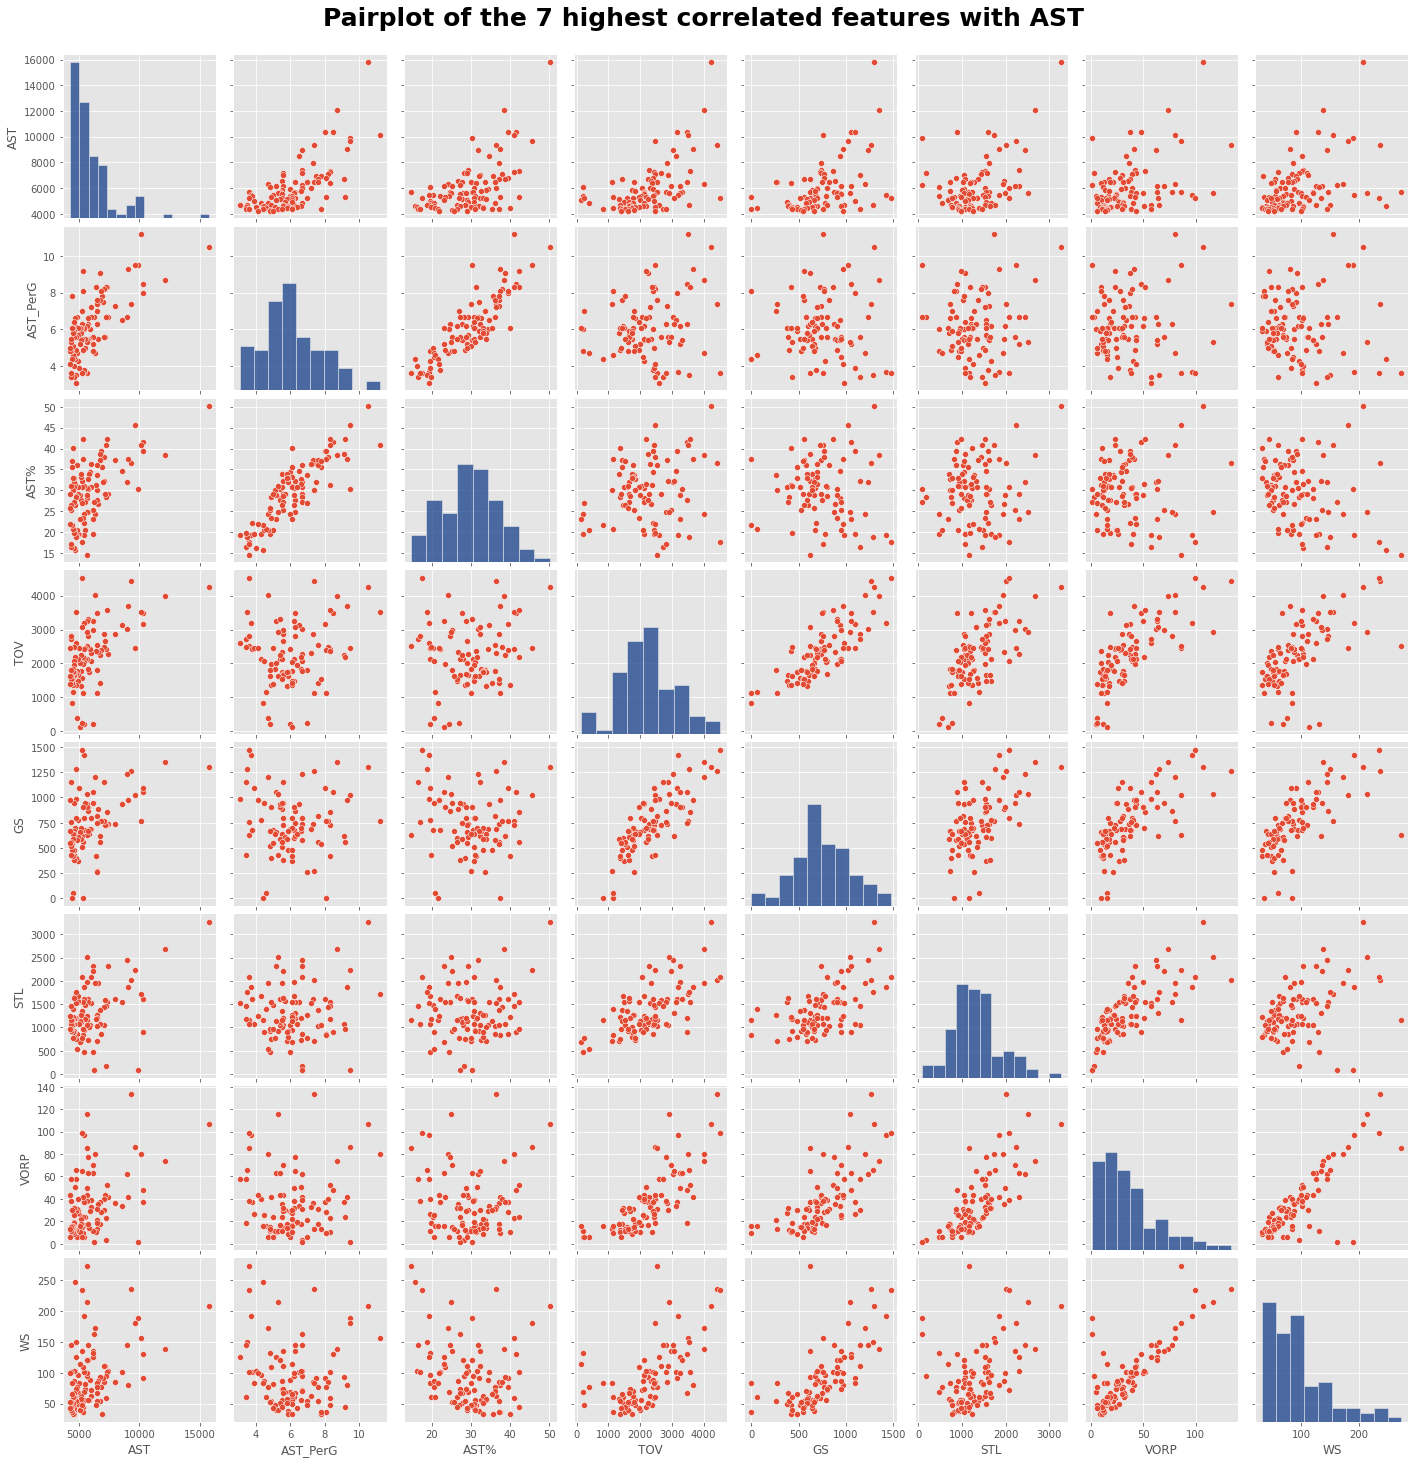

In [14]:
top_corr=corr.nlargest(8,'AST').index
#Usign top 8 so we get the 3 assist related stats and the other 5 best
fig =sns.pairplot(ast_leaders, vars = top_corr, diag_kws={'color':'#17408B'})
fig.fig.suptitle('Pairplot of the 7 highest correlated features with AST ',fontsize = 25, fontweight ='bold', y =1.02)

The objective of this data analysis is to determine if Kobe was a selfish player or not, so let's take a look on how he fares against the other players in the top 100.

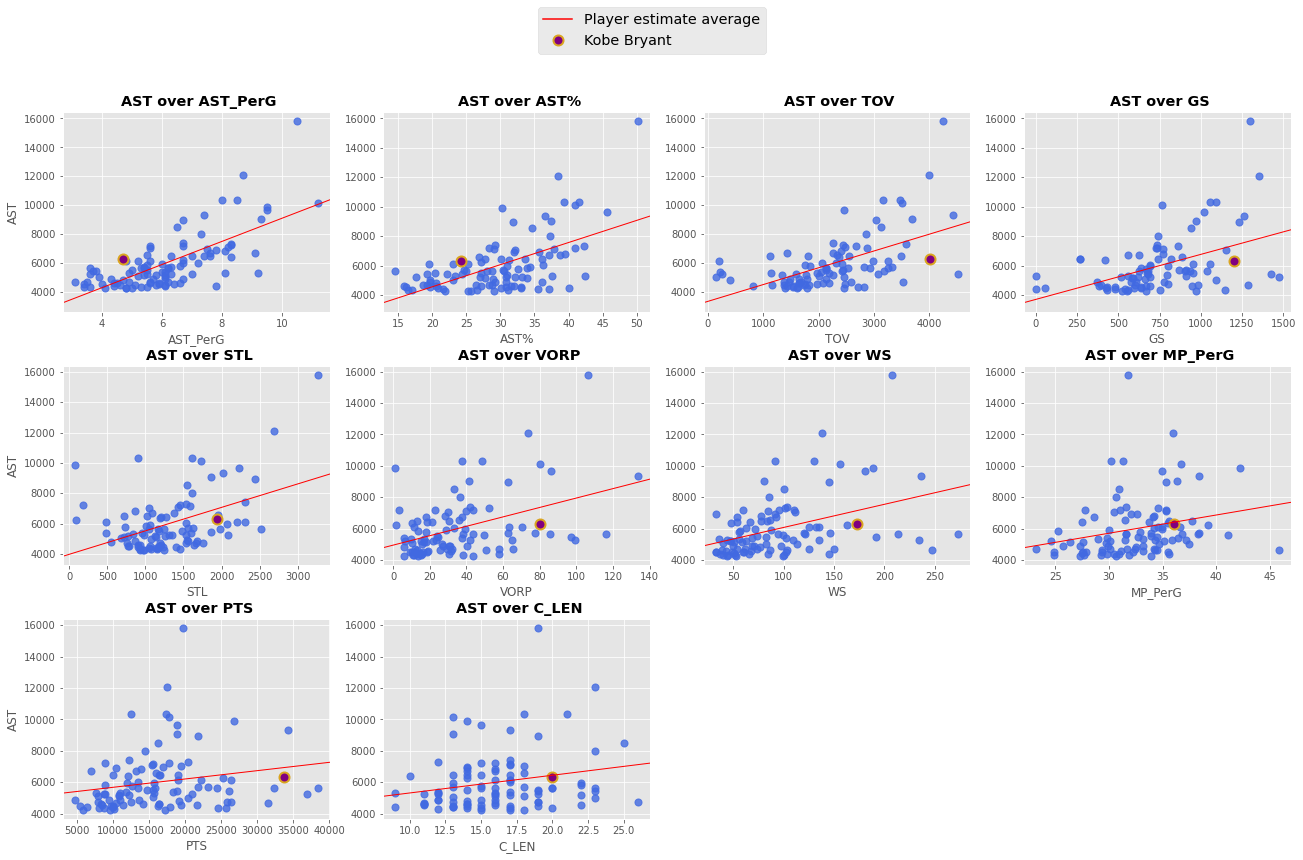

In [15]:
fig, axs = plt.subplots(3,4, figsize =(22,13))
stats = list(top_corr)
stats.extend(['MP_PerG','PTS','C_LEN'])
i=0
for ax,stat in zip(axs.flat[:-2], stats[1:]):
    if i%4==0:
        sns.regplot(data = ast_leaders, y = 'AST', x=stat,  line_kws={'color':'red','linewidth':1} 
                    , scatter_kws={'color':'royalblue','s':50},ci = None, truncate = False, ax =ax)
        sns.scatterplot(data = ast_leaders, y ='AST', x =ast_leaders[ast_leaders['Name'] == 'Kobe Bryant'][stat],
                        color = 'purple', s =100,edgecolor ='goldenrod', linewidth =2,ax = ax)
        ax.set_title (f' AST over {stat}', fontweight = 'bold')
    else:
        sns.regplot(data = ast_leaders, y = 'AST', x=stat,  line_kws={'color':'red','linewidth':1} 
                    , scatter_kws={'color':'royalblue','s':50},ci = None, truncate = False, ax =ax)
        sns.scatterplot(data = ast_leaders, y ='AST', x =ast_leaders[ast_leaders['Name'] == 'Kobe Bryant'][stat],
                        color = 'purple', s =100,edgecolor ='goldenrod', linewidth =2,ax = ax)
        ax.set_title (f' AST over {stat}', fontweight = 'bold')  
        ax.set_ylabel('')
    i+=1
#Creating the legend myself
import matplotlib.lines as mlines
avg = mlines.Line2D([],[], color = 'red', label = 'Player estimate average')
kobe =mlines.Line2D([],[], color = 'white', linewidth = 0, marker = 'o', markersize = 10,
                    markerfacecolor= 'purple', markeredgecolor ='goldenrod', markeredgewidth =2,  label = 'Kobe Bryant')
fig.legend(handles =[avg,kobe], fontsize = 'x-large',loc = 'upper center')
axs[2,2].axis('off')
axs[2,3].axis('off')
plt.subplots_adjust(hspace =0.27)

In [16]:
b= list(top_corr).extend(['a'])
b

Here we can see how Kobe is below average in AST_PerG and AST% and above average in TOV, GS,STL and VORP.

The stats in which he's below average do not bold well for him as unselfish player, and the above average in GS started points toward his high number of assists being a produt of how many games he played. TOV above average is also not a good stat

The above average STL speaks more about his defense capability than him as passer, in fact I believe the reason STL is so highly correlated to AST is due to the fact tha most players are guards which means that on defense they playe more on the wings disrupting passing lanes and pressing opponents before they shoot. 

VORP is also another stat that doesn't necessarily bring information about how Kobe fares against the top 100 players in assits, as it's advanced stat that take many other variables and with a higher weight than assists (https://www.basketball-reference.com/about/glossary.html)


Another variables that can help us tell a story is the relationshipS of AST with minutes played per game(MP_PerG), total points (PTS) and carrer length (C_LEN)



Kobe is above average in all these comparissons, this reinforces the idea that Kobe was a ball hog and his high assist number came because he played a lot and for a long time.

"But Kobe is a shooting guard, not a passing guard." is phrase that we hear when this is discussed. Well, we have 46 shooting guards out of a hundred, so we can assume that a shooting guard is a position that gets a lot of assists, almost as much as point guard(at least when it comes to a high number of them). BUt it's kobe more of a "shooting" guard than other SGs?

In [17]:
cols = list(top_corr)
#For this analysis we also wnat to take a look at field goal attempts per game(FGA_PerG)
cols.extend(['MP_PerG','PTS','C_LEN','FGA_PerG','Pos'])
sg_df = ast_leaders[cols].groupby(['Pos']).aggregate(['mean','std']).tail(1)
sg_df.columns = ['_'.join(x) for x in sg_df.columns.ravel()]
mean_cols = [col for col in sg_df.columns if 'mean' in col]
std_cols = [col for col in sg_df.columns if 'std' in col]
sg_mean = sg_df[mean_cols]
sg_std = sg_df[std_cols]
kb_df = ast_leaders[ast_leaders['Name'] =='Kobe Bryant'][cols[:-1]]
#Let's standerized Kobe stats to the SG mean, so we can plot all of them in the same plot
#kb_std = [(stat-mean)/std for stat,mean,std in zip(kb_df.values,sg_mean.values,sg_std.values)]
stat=kb_df.to_numpy()
mean=sg_mean.to_numpy()
std = sg_std.to_numpy()
kb_std= (stat-mean)/std


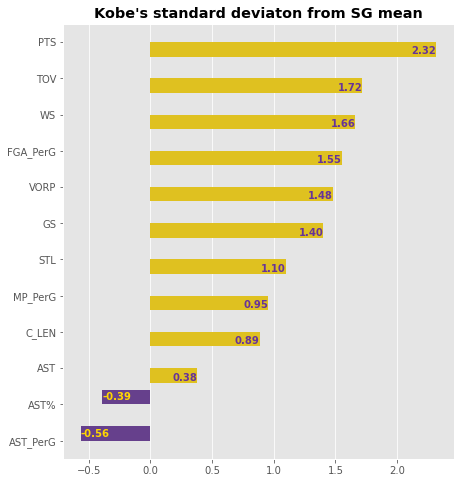

In [18]:
from operator import itemgetter
cols = list(kb_df)
data=[(i,j) for i,j in zip(kb_std[0],cols)]
data = sorted(data,key=itemgetter(0), reverse=True)
data = list(zip(*data))
y_axis=list(data[1])
x_axis= list(data[0])
positive=[ x >=0 for x in x_axis]
f,ax = plt.subplots(figsize =(7,8))
sns.barplot(y =y_axis, x = x_axis, orient = 'h', hue =positive, palette = ['rebeccapurple','gold'])
plt.legend('',frameon=False)
plt.title("Kobe's standard deviaton from SG mean", fontweight ='bold')
for i, v in enumerate(x_axis[:-2]):
    ax.text(v-.2, i + .25, "%.2f" % v, color='rebeccapurple',va='center', fontweight='bold')
for i, v in enumerate(x_axis[-2:]):
    ax.text(v, i + 9.8, "%.2f" % v, color='gold',va='center', fontweight='bold')

The results are almost a mirror from the comparisson among all positions and we can also see how little his assits number deviate from the mean when compared to other stats like points, winshares and field goal attempts

From the exploratory analysis the conclusion I've arrived is that Kobe high assist numbers are a product of a hihger minutes per game played than avarage for a higher number of games started and carrer length than most players. And that he was actually a more selfish player than average.

But let's see what a classification model has to say

Because of the high numbers  of features and colinearity  between them we will build a PCA model.

In [19]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#The model df will be the ast_leaders dataframe with the exception of Rank, Name and Pos, as those are categorical variables and pca is designed
#for continuous data. We also have to remove data with Null values.
model_df = ast_leaders.drop(columns =['Name','Rank','Pos'])
model_df.dropna(axis = 1, inplace = True)
index = model_df.columns
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   C_LEN     100 non-null    int64  
 1   G         100 non-null    int64  
 2   MP        100 non-null    float64
 3   FG        100 non-null    int64  
 4   FGA       100 non-null    int64  
 5   FG%       100 non-null    float64
 6   FT        100 non-null    int64  
 7   FTA       100 non-null    int64  
 8   FT%       100 non-null    float64
 9   TRB       100 non-null    int64  
 10  AST       100 non-null    int64  
 11  PF        100 non-null    int64  
 12  PTS       100 non-null    int64  
 13  MP_PerG   100 non-null    float64
 14  FG_PerG   100 non-null    float64
 15  FGA_PerG  100 non-null    float64
 16  FT_PerG   100 non-null    float64
 17  FTA_PerG  100 non-null    float64
 18  TRB_PerG  100 non-null    float64
 19  AST_PerG  100 non-null    float64
 20  PF_PerG   100 non-null    float64

When building a pca is important to center the mean at zero, and standardize the data  when there's a big discrepancy in scale betwen them.
We will choose the optimal ammount using the elbow method

In [20]:
#Zero-centering and standardization funciton
scaler = StandardScaler()
model_df =scaler.fit_transform(model_df)
pca = PCA(n_components = 10)
pca.fit_transform(model_df)
scree =pca.explained_variance_ratio_
cum_var =[scree[:i+1].sum() for i in range(len(scree))]


Text(0, 0.5, 'Explained variance')

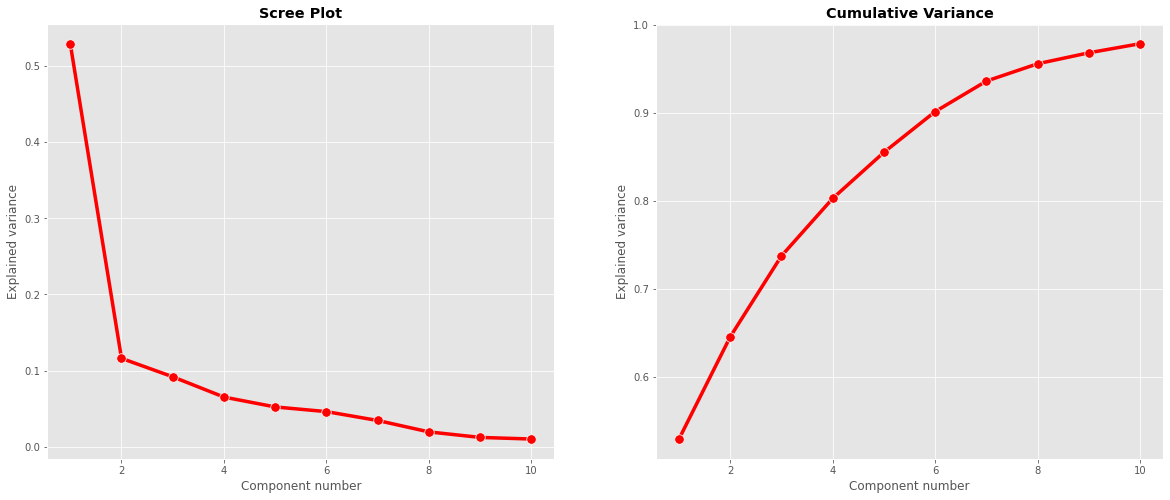

In [21]:
fig, axs = plt.subplots(1,2, figsize=(20,8))
sns.lineplot(y=scree, x = range(1,11), ax = axs[0],marker = 'o', color = 'red', linewidth =3.5, markersize = 9.5)
sns.lineplot(y = cum_var, x = range(1,11), ax= axs[1],marker = 'o', color = 'red', linewidth =3.5, markersize = 9.5)
axs[0].set_title('Scree Plot',{'fontweight':'bold'})
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Explained variance')
axs[1].set_title('Cumulative Variance',{'fontweight':'bold'})
axs[1].set_xlabel('Component number')
axs[1].set_ylabel('Explained variance')

Using the entire dataset produced an underwhelming PCA, by the elbow method we would utilize 2 components, explaining only around 60% of the variance to arrive at something like 85% we would need 6 components.
Let'se see how the model will behave with the variables that have great correlation with AST


Text(0, 0.5, 'Explained variance')

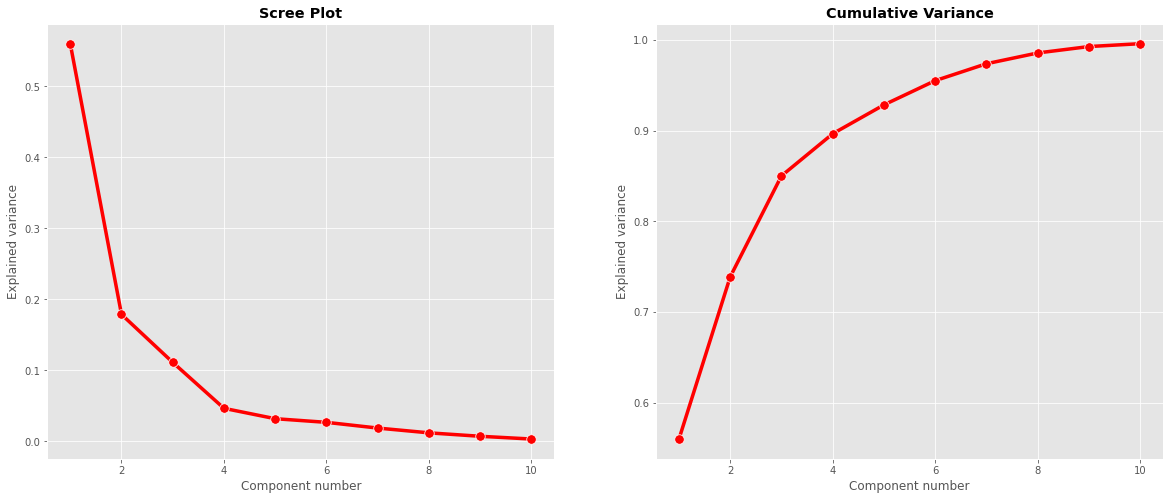

In [22]:
model_df = ast_leaders[corr.index].copy()
model_df.dropna(axis =1,inplace = True)
scaler = StandardScaler()
model_df =scaler.fit_transform(model_df)
pca = PCA(n_components = 10)
pca.fit_transform(model_df)
scree =pca.explained_variance_ratio_
cum_var = cum_var =[scree[:i+1].sum() for i in range(len(scree))]
fig, axs = plt.subplots(1,2, figsize=(20,8))
sns.lineplot(y=scree, x = range(1,11), ax = axs[0], marker = 'o',color = 'red', linewidth =3.5, markersize = 9.5)
sns.lineplot(y = cum_var, x = range(1,11), ax= axs[1],marker = 'o',color = 'red', linewidth =3.5, markersize = 9.5)
axs[0].set_title('Scree Plot',{'fontweight':'bold'})
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Explained variance')
axs[1].set_title('Cumulative Variance',{'fontweight':'bold'})
axs[1].set_xlabel('Component number')
axs[1].set_ylabel('Explained variance')

By removing data that only added noise to what we're are trying to see, we get a better PCA, now to reach an 85% variance explained we only need 3 components


In [23]:
model_df = ast_leaders[corr.index].copy()
model_df.dropna(axis =1,inplace = True)
index = model_df.columns
scaler = StandardScaler()
model_df =scaler.fit_transform(model_df)
pca = PCA(n_components = 3)
pca_ast = pca.fit_transform(model_df)
loadings = pd.DataFrame(pca.components_.T, columns =['PC1','PC2','PC3'], index = index)
loadings

,PC1,PC2,PC3
C_LEN,0.117756,-0.233908,0.506417
G,0.241300,-0.226886,0.399817
MP,0.301918,-0.122694,0.206828
FT,0.302240,0.018382,-0.138523
FTA,0.305385,0.008517,-0.152236
AST,0.119672,0.375449,0.477238
PF,0.237349,-0.191512,0.159546
PTS,0.319714,-0.064391,-0.090306
MP_PerG,0.230286,0.155059,-0.255883
AST_PerG,-0.046239,0.554364,0.153052


Taking a look at the loadings of each components we can interpret what information each component try to explain. 
PC1 explains the variance of the data taking into account the offensive prowess of the players indicated by the high loading of free throws statics, points and winshares (WS and OWS)
PC2 gives importance to the number of assists(the three assist stats have the highest loading)
PC3 on the other hand trys to explain the variance with the ammount of time the player played (G, MP and C_LEN) and the number of assists

With this in mind we can expect that scoring minded players will have a high PC1 score, pass first players will have a high PC2 score and players with longer carrers that played a lot of games and minutes will have a gigh PC3 score

With three principal components we get a good ammount of explained variance and each component gives 3 good directions to avaliate the players, but it would aso require a 3D visualization. So for visualition purposes we will use only 2 componnents (elbow method also supports this choice), fortunally 2 componnents give us a good ammount of explained variance (75%) and the difference in directions of the weigths between PC1 and PC2 on G, MP and C_LEN could overturn the loss of PC3 

In [24]:
names=set(ast_leaders['Name'])
#List of other great socorers who might be in the list to compare to Kobe
great_scorers = ['Michael Jordan','Kevin Durant','James Harden','Paul Pierce','Vince Carter','Tim Duncan','Kevin Garnet'
            'Dirk Nowitzki','Carmelo Anthony','LeBron James','Dwyane Wade','Russel Westbrook','Stephen Curry','Klay Thompson']
found=[]
for n in scorers:
    if n in names:
        found.append(n)
index=[ast_leaders[ast_leaders['Name']==n].index for n in found]

pca_df = pd.DataFrame(pca_ast, columns =['PC1', 'PC2', 'PC3'])
median1 =[pca_df['PC1'].median()]*2
median2 =[pca_df['PC2'].median()]*2
fig, axs = plt.subplots (figsize=(10,10))
sns.scatterplot(data = pca_df, x='PC1', y ='PC2',color = 'royalblue')
plt.plot(median1, [min(pca_df['PC2']), max(pca_df['PC2'])], color = 'red', alpha = 0.5,linestyle = '--', dashes= (5,5), label ='median')
plt.plot([min(pca_df['PC1']), max(pca_df['PC1'])],median2, color = 'red', alpha = 0.5,linestyle = '--', dashes= (5,5))
sns.scatterplot(data = pca_df.iloc[[30]], x='PC1', y ='PC2',color = 'goldenrod',edgecolor ='purple', linewidth =1)
axs.annotate('Kobe Bryant',(pca_df['PC1'][30]+.1,pca_df['PC2'][30]),fontweight ='bold')
for i,name in zip(index,found):
    sns.scatterplot(data = pca_df.iloc[i], x='PC1', y ='PC2',color = 'red')
    axs.annotate(name,(pca_df['PC1'][i],pca_df['PC2'][i]))
fig.suptitle('PC1 vs PC2', fontweight ='bold', x=0.5, y=0.93)

NameError: name 'scorers' is not defined

Kobe is weel above te median in terms of scoring and below the median when it comes to passing.
The PCA model also lead us to the same conclusion. Despite Kobe being among the top 100 aassist leaders in the NBA, he was not a prolific passer and most likely his high assist number are due to the ammount of minutes he was on the floor. Yes kobe was a ball-hog.

We could've done this analysis among all SG or among all other players, maybe this would be more fair to Kobe. The reason I choose to do this analysis among the all time leaders is because the argument that most Kobe defenders(I was one of them) used was his belonging to this list.

PS
I want to creat an extra visualization for the readme

In [ ]:
fig, axs = plt.subplots (figsize=(5,8))
sns.heatmap(loadings,annot=True,cmap='bwr_r',cbar=False,center = 0)
fig.suptitle('PCA loadings',fontweight='bold',x=.5,y=0.93)